In [212]:
import numpy as np
import pandas as pd

%matplotlib inline

In [147]:
missing_values = ["n/a", "na", "--"]

In [149]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv',
               na_values = missing_values )

In [150]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## Standard Missing Values
Missing values yang dapat dideteksi oleh pandas

In [151]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [152]:
df['ST_NUM'].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [8]:
df['NUM_BEDROOMS']

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [153]:
df['NUM_BEDROOMS'].isnull()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

## Unexpected Missing Values
Contohnya adalah tipe data tidak terduga, misalnya fitur kita diharapkan berupa string, tetapi jenisnya malah numerik, maka secara teknis juga merupakan missing value

In [154]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [155]:
df['OWN_OCCUPIED'].isnull()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

Di baris ke empat ada angka 12, respon untk owner occupied jelas harus berupa string (Y atau N), jadi tipe numerik ini berupa missing value.

Contoh ini sedikit lebih rumit, sehingga kita perlu memikirkan strategi untuk mendeteksi nilai yang hilang ini. Ada sejumlah pendekatan yang berbeda, berikut adalah salah satunya
* Loop pada kolom OWN_OCCUPIED
* Kita coba ubah semua entry menjadi integer
* Jika entry tidak dapat diubah menjadi integer, tandasi sebagai missing value
* Jika tidak dapat menjadi integer, maka kita tau kalau entry adalah string, keep going.

In [156]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
#         Kalo datanya bisa diubah ke interger, berarti nan
        int(row)
        df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

Dalam kode diatas, untuk mengubah entru menjadi integer kita menggunakan int(row)

Menggunakan try dan except ValueError ini diseput exception handling, dan kita menggunakan ini untuk menangani errors. 

Jika kita mencoba mengubah entri menjadi integer dan tidak dapat diubah, Value error akan di return, dan kode akan berhenti. Untuk mengatasi ini, kita menggunakan exception handling untuk mengenali error ini, dan terus berjalan.

## Summarizing Missing Values

In [157]:
df.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [158]:
# Melihat ada data null ngga
df.isnull().values.any()

True

In [159]:
# Jumlahin data nullnya dong
df.isnull().sum().sum()

12

## Replacing
Boleh dengan dihapus barisnya atau di ganti nilainya

In [160]:
# Mengisi data null dengan suatu nilai
df['ST_NUM'].fillna(125, inplace=True)

In [161]:
# Langsung inputin nilainya ke suatu sel
df.loc[2, 'ST_NUM'] = 125

In [162]:
# Cara umum, mengganti missing values dengan median
median = df['NUM_BEDROOMS'].median() # buat variabel untuk mediannya dulu
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [163]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [164]:
# Cara umum, mengganti missing values dengan meam
mean = df['PID'].mean() # buat variabel untuk meannya dulu
df['PID'].fillna(mean, inplace=True)

In [165]:
# Cara umum, mengganti missing values dengan modus
# mode = df['NUM_BATH'].mode() # buat variabel untuk modusnya dulu
df['NUM_BATH'].fillna(1, inplace=True)

In [166]:
df['OWN_OCCUPIED'].fillna('N', inplace=True)

In [167]:
df['SQ_FT'].fillna(df['SQ_FT'].mean(), inplace=True)

In [168]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,N,1.0,1,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,N,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


# Analyzing Obesity in England

In [169]:
data = pd.ExcelFile('../data/obes.xls')

In [170]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [171]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [172]:
data_age.head()

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0


Baris pertama mewakili colom headers. Kita memiliki baris kosong di file, dan itu muncul sebagai nan

Sehingga kita perlu melakukan dua hal
* Rename the first header to year
*Get rid of any empty rows

In [173]:
# Mengganti kolome rename jadi year
data_age.rename(columns={u'Unnamed: 0' : u'Year'},
                         inplace=True)

In [174]:
# Menghapus baris kosong
data_age.dropna(inplace=True)

In [175]:
data_age.set_index('Year', inplace=True)

In [176]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<AxesSubplot:xlabel='Year'>

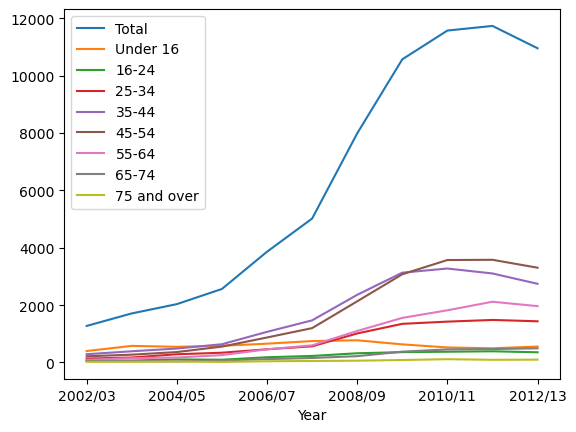

In [177]:
data_age.plot()

Ups. Ada masalah. Data asli kita memilik total yang menutupi bidang lainnya. Kita perlu menyingkirkannya.

In [178]:
data_age_minus_total = data_age.drop('Total', axis=1)

<AxesSubplot:xlabel='Year'>

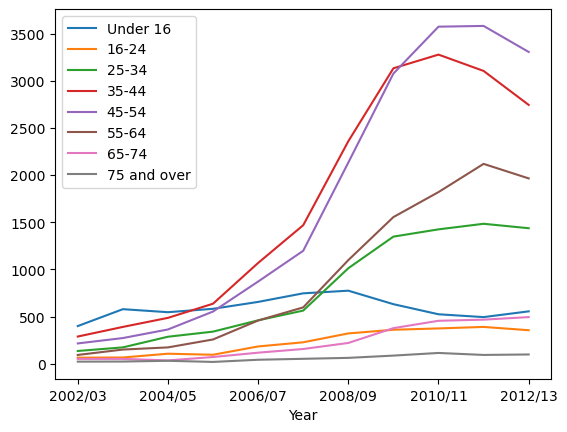

In [179]:
data_age_minus_total.plot()

Kembali ke pertanyaan, are children getting fatter?

Mari kita buat plot sebagian kecil data: anak-anak di bawah usia 16 tahun dan orang dewasa denga rentang usia 35-44 tahun.

<AxesSubplot:xlabel='Year'>

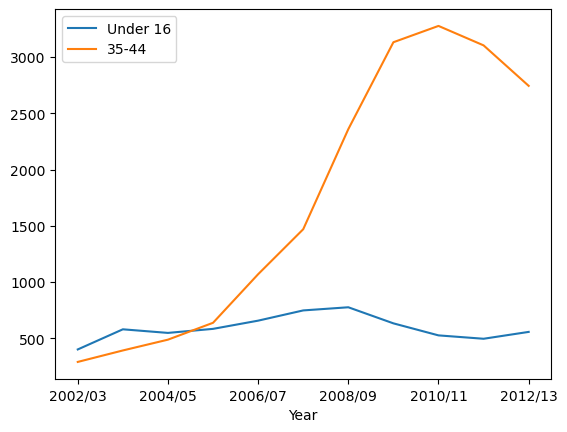

In [180]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

Jadi, who is getting fatter?

Ketika obesitas anak sedikit menurun, orang tua mereka membengkak. Jadi nampaknya para ornag tua lebih perlu mengkhawatirkan diri sendiri daripada anak-anaknya.

## Time series

### Basic Time series manipulation

In [181]:
from datetime import datetime

In [182]:
date_rng = pd.date_range(start='1/02/2020', end='1/08/2020', freq='H')

In [183]:
date_rng

DatetimeIndex(['2020-01-02 00:00:00', '2020-01-02 01:00:00',
               '2020-01-02 02:00:00', '2020-01-02 03:00:00',
               '2020-01-02 04:00:00', '2020-01-02 05:00:00',
               '2020-01-02 06:00:00', '2020-01-02 07:00:00',
               '2020-01-02 08:00:00', '2020-01-02 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=145, freq='H')

Mari buat contoh data frame dengan timestamp dan lihat 15 elemen pertama

In [184]:
df = pd.DataFrame(date_rng, columns=['date'])

In [185]:
df['data'] = np.random.randint(0,100,size=(len(date_rng)))

In [186]:
df.head()

,date,data
0,2020-01-02 00:00:00,84
1,2020-01-02 01:00:00,70
2,2020-01-02 02:00:00,48
3,2020-01-02 03:00:00,25
4,2020-01-02 04:00:00,78


In [187]:
df['datetime'] = pd.to_datetime(df['date'])

In [188]:
df = df.set_index('datetime')

In [189]:
df.drop(['date'], axis=1, inplace=True)

In [190]:
df.head()

,data
datetime,
2020-01-02 00:00:00,84
2020-01-02 01:00:00,70
2020-01-02 02:00:00,48
2020-01-02 03:00:00,25
2020-01-02 04:00:00,78


Bagaimana jika time stamps dalam data kita sebenarnya berjenis string vc numerik?

Mari kita ubah date_rng kita menjadi list of string dan kemudian ubah string tersebut menjadi stempel waktu

In [191]:
string_date_rng = [str(x) for x in date_rng]

Kita dapat mengkonversi string menjadi timestamps dengan melihat formatnya, lalu melihat nilainya:

In [192]:
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)

In [193]:
timestamp_date_rng

DatetimeIndex(['2020-01-02 00:00:00', '2020-01-02 01:00:00',
               '2020-01-02 02:00:00', '2020-01-02 03:00:00',
               '2020-01-02 04:00:00', '2020-01-02 05:00:00',
               '2020-01-02 06:00:00', '2020-01-02 07:00:00',
               '2020-01-02 08:00:00', '2020-01-02 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=145, freq=None)

Coba datestamps dengan berbagai format penulisan tanggal

In [194]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020', 'June-03-2020']

In [195]:
timestamp_date_rng_2 = [datetime.strptime(x, '%B-%d-%Y') for x in string_date_rng_2]

In [196]:
timestamp_date_rng_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [197]:
df2 = pd.DataFrame(timestamp_date_rng_2, columns=['date'])

In [198]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


Kembali ke dataframe asli kita, misalkan kita ingin melihat data di mana tanggalknya adalah taggal 2 setiap bulannya, kita bisa menggunakan indeks seperti dibawah ini.

In [199]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,84
2020-01-02 01:00:00,70
2020-01-02 02:00:00,48
2020-01-02 03:00:00,25
2020-01-02 04:00:00,78
2020-01-02 05:00:00,12
2020-01-02 06:00:00,18
2020-01-02 07:00:00,3
2020-01-02 08:00:00,45


Kita juga bisa memanggil langsung tanggal untuk melihatnya

In [200]:
df['2020-01-03']

C:\Users\ACER\AppData\Local\Temp\ipykernel_9768\186698106.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-03']


,data
datetime,
2020-01-03 00:00:00,35
2020-01-03 01:00:00,7
2020-01-03 02:00:00,17
2020-01-03 03:00:00,95
2020-01-03 04:00:00,26
2020-01-03 05:00:00,60
2020-01-03 06:00:00,70
2020-01-03 07:00:00,60
2020-01-03 08:00:00,2


memilih data dengan rentang tertentu

In [201]:
df['2020-01-04':'2020-02-06']

,data
datetime,
2020-01-04 00:00:00,45
2020-01-04 01:00:00,78
2020-01-04 02:00:00,61
2020-01-04 03:00:00,75
2020-01-04 04:00:00,32
...,...
2020-01-07 20:00:00,92
2020-01-07 21:00:00,46
2020-01-07 22:00:00,13


Basicnya dataframe tersebut memberi data perjam, tetapi kita dapat mengambil ulang sample data pada frekuensi yang berbeda dan menentukan bagaimana kita ingin menghitung summary statistic untuk frekuensi sample baru.

Kita dapat mengambil min, max, averange, sum, dll. Dari data pada frekuensi harian daripada frekuensi perjam seperti contoh dibawah ini tempat kita menghitung rata-rata harian dari data:

In [202]:
df.resample('D').mean()

,data
datetime,
2020-01-02,42.958333
2020-01-03,45.458333
2020-01-04,57.500000
2020-01-05,51.291667
2020-01-06,50.250000
2020-01-07,51.833333
2020-01-08,28.000000


In [203]:
df['rolling_sum'] = df.rolling(3).sum()
# df['rolling_sum']

In [204]:
df.head()

,data,rolling_sum
datetime,,
2020-01-02 00:00:00,84,NaN
2020-01-02 01:00:00,70,NaN
2020-01-02 02:00:00,48,202.0
2020-01-02 03:00:00,25,143.0
2020-01-02 04:00:00,78,151.0


Kita dapat melihat bahwa pandas menghitung dengan benar dan hanya memiliki nilai yang valid ketika ada tiga periode untuk melihat kebelakang.

Berikut adalah df dengan kolom baru yang mengambil rolling sum dan backfills data

In [206]:
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df.head()

,data,rolling_sum,rolling_sum_backfilled
datetime,,,
2020-01-02 00:00:00,84,NaN,202.0
2020-01-02 01:00:00,70,NaN,202.0
2020-01-02 02:00:00,48,202.0,202.0
2020-01-02 03:00:00,25,143.0,143.0
2020-01-02 04:00:00,78,151.0,151.0


## Time Series 

In [222]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv')

In [224]:
opsd_daily.shape

(4383, 5)

In [223]:
opsd_daily.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [225]:
opsd_daily.tail(3)

,Date,Consumption,Wind,Solar,Wind+Solar
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [229]:
opsd_daily = opsd_daily.set_index('Date')
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [230]:
opsd_daily.index

Index(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
       '2006-01-06', '2006-01-07', '2006-01-08', '2006-01-09', '2006-01-10',
       ...
       '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-26',
       '2017-12-27', '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31'],
      dtype='object', name='Date', length=4383)

In [231]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [240]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)

Aspek berguna lainnya dari datetimeIndex adalah bahwa setiap tanggal/waktu tersedia sebagai atribut seperti tahun, bulan, hari, dan Maru tambahkan beberapa kolom lagi ke opsd_daily, yang berisi tahun, bulan, dan hari kerja.

In [241]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday

In [242]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [243]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


Kita dapat memilih data satu hari seperti:

In [244]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [246]:
# memilih slice dari hari
opsd_daily.loc['2014-01-20' : '2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,0
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,1
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,2


Fitur lain dari pandas time series adalah partial-string indexong, si mana kita dapat memilih semua tanggal/waktu yang sebagian cocok dengan string yang diberikan.
Misalnya memilih tahun 2006 saja dengan

opsd_daily.loc['2006']

Atau seluruh bulan februari tahun 2012 dengan 

opsd_daily.loc['2012-02']

## Visualisasi

#### Plot komsumsi listrik harian di jerman

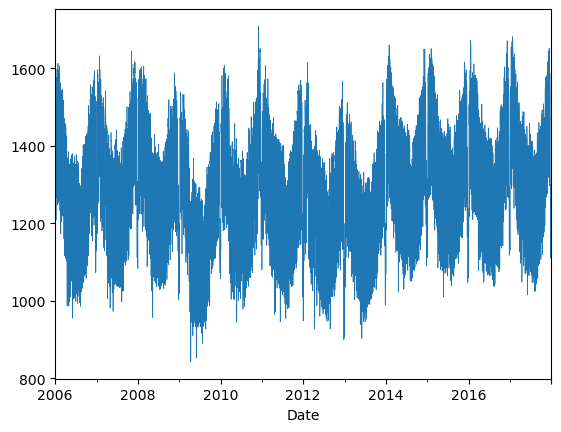

In [250]:
opsd_daily['Consumption'].plot(linewidth=0.5);

#### Plot data sebagai titik-titik dari time series dari Matahari dan angin

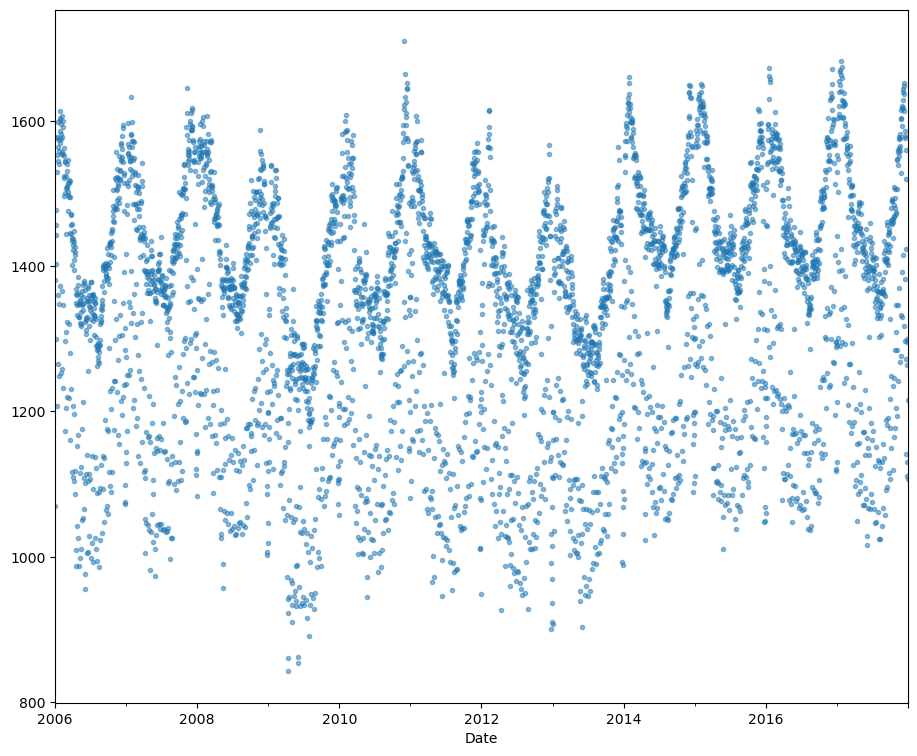

In [251]:
opsd_daily['Consumption'].plot(marker='.', alpha=0.5,
                              linestyle='None', figsize=(11,9));

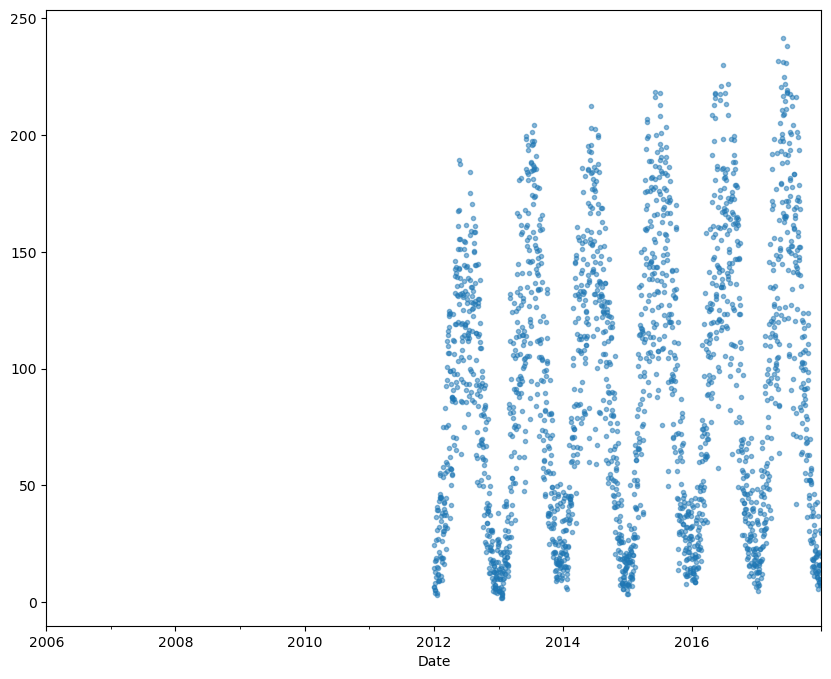

In [253]:
opsd_daily['Solar'].plot(marker='.', alpha=0.5,
                              linestyle='None', figsize=(10,8));

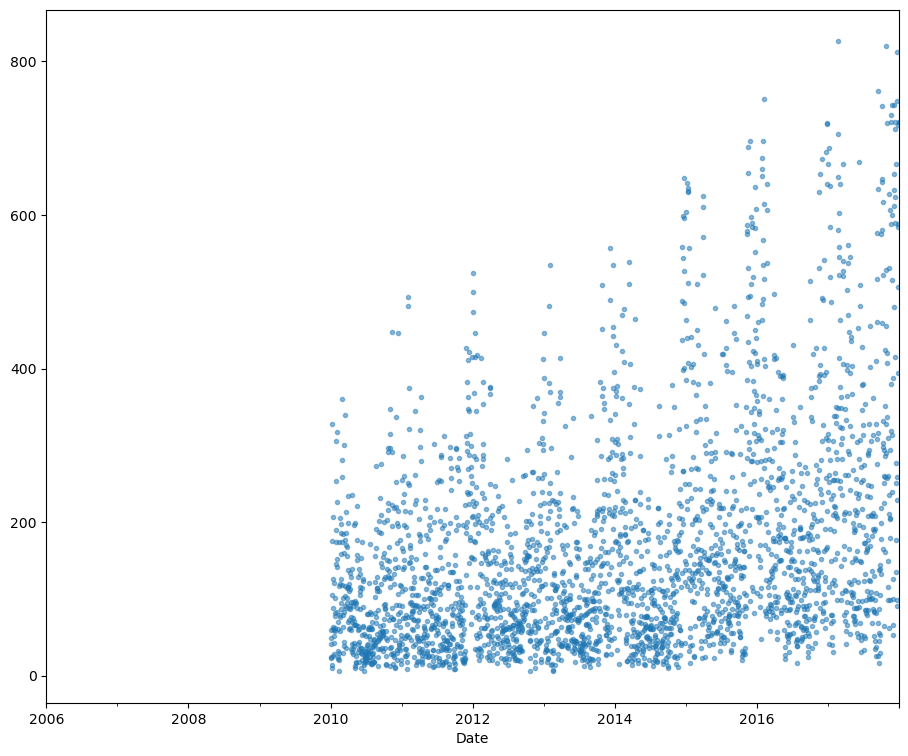

In [254]:
opsd_daily['Wind'].plot(marker='.', alpha=0.5,
                              linestyle='None', figsize=(11,9));

### Pola-pola menarik dari data
* Konsumsi listrik tertinggi ada di musim dingin, kemungkinan karena pemanas listrik dan peningkatan penggunaan penerangan, dan terendah di musim panas.
* Produksi tenaga surya paling tinggi di musim panas.
* Produksi tenaga angin paling tertinggi pada musim dingin.
* Tampaknya ada tren peningkatan yang kuat dalam produksi angin selama bertahun-tahun.

Plot deret waktu untuk analisis penggunaan listrik lebih lanjut

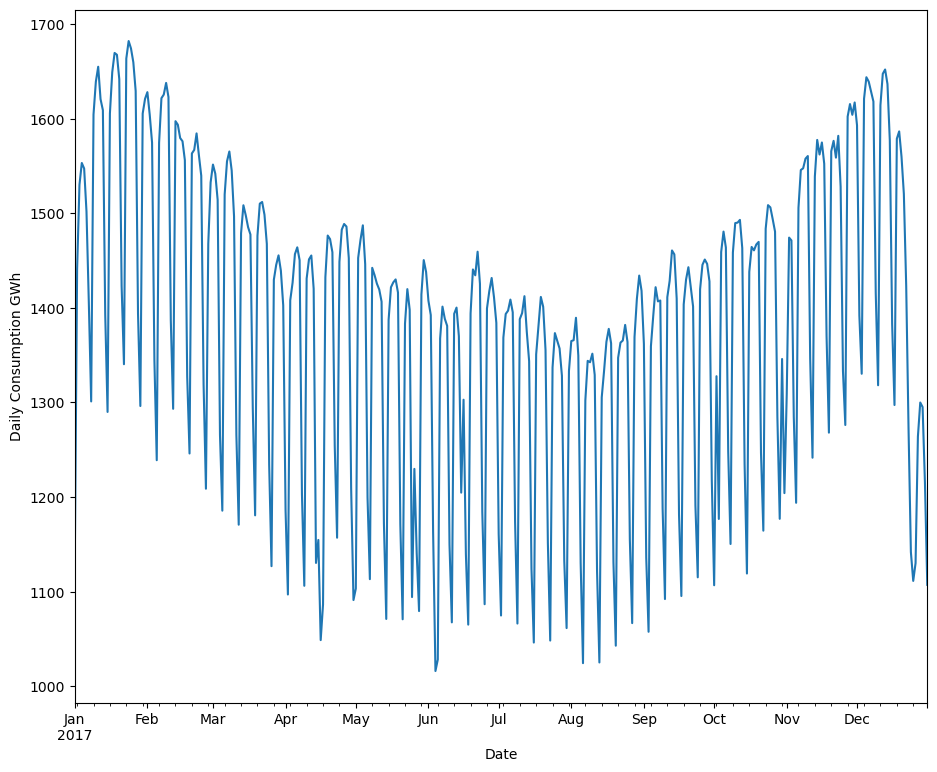

In [256]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumption GWh');

Terjadi penurunan drastis konsumsi listrik pada awal bulan januari dan akhir desember, selama liburan

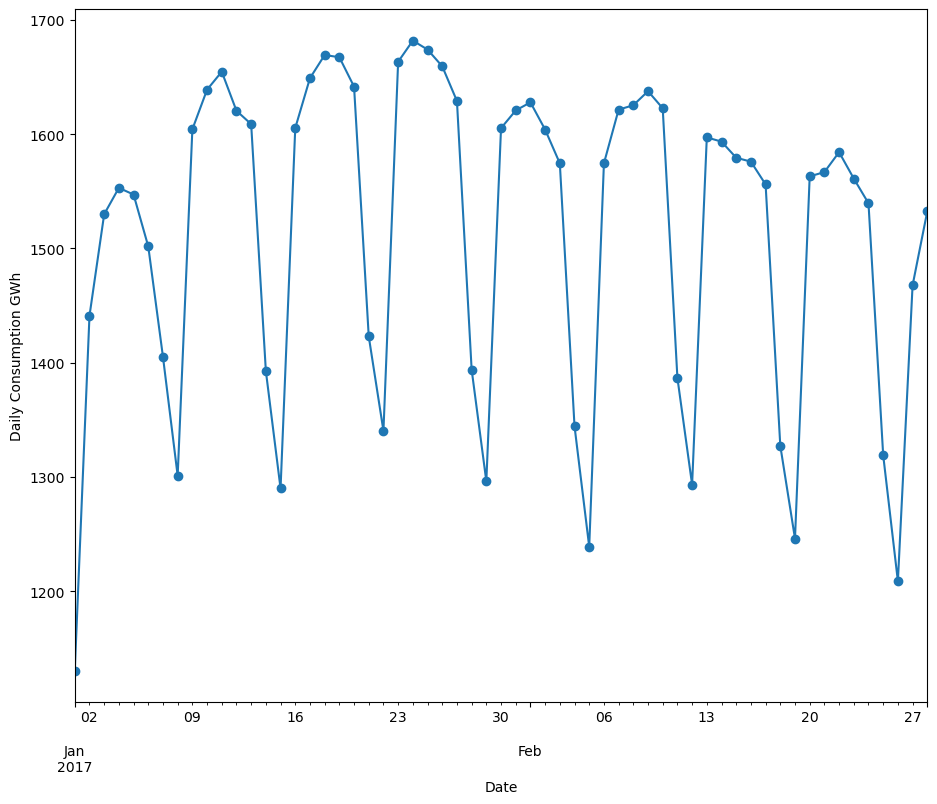

In [265]:
# Melihat pada bulan januari dan februari saja
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-',figsize=(11,9))
ax.set_ylabel('Daily Consumption GWh');

### Boxplot
Selanjutnya kita gunakan box plotsuntuk mengelompokkan data berdasarkan periode waktu yang berbeda dan menampilkan distribusi untuk setiap kelompok. 

Pertama-tama, kita akan mengelompokkan data berdasarkan bulan, untuk memvisualisasi yearly seasonality

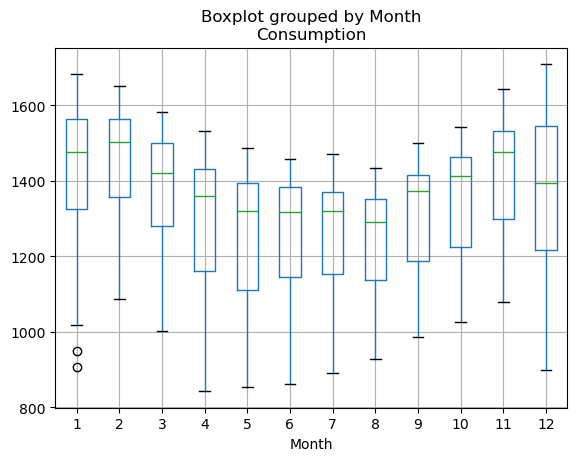

In [267]:
opsd_daily.boxplot(column=['Consumption'], by='Month');

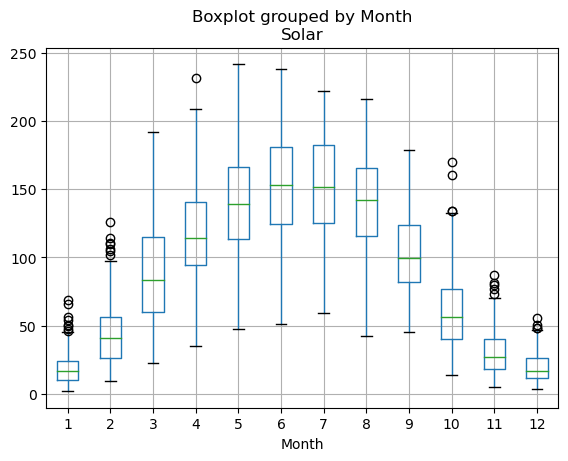

In [269]:
opsd_daily.boxplot(column=['Solar'], by='Month');

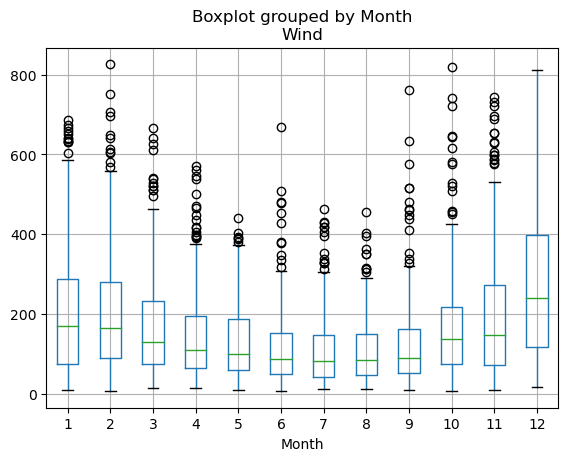

In [270]:
opsd_daily.boxplot(column=['Wind'], by='Month');

### Insight dari box plots:
* Meskipun konsumsi listrik umumnya lebih tinggi di musim dingin dan lebih rendah dimusim panas, median dan dua kuartil lebih rendah pada bulan desember dan januari dibandingkan november dan februari, kemungkinan karena bisnis tutup selama liburan. Kita melihat ini dalam rangkaian waktu untuk tahin 2017, dan box plot menegaskan bahwa ini adalah pola yang konsisten silama bertahun-tahun.
* Sementara produksi tenaga surya dan angin sama-sama memiliki banyak outliers, yang mencerminkan efek kecepatan angin ekstrem sesekali yang terkait dengan badai dan kondisi cuaca sementara lainnya.

### Mengelompokkan per minggu

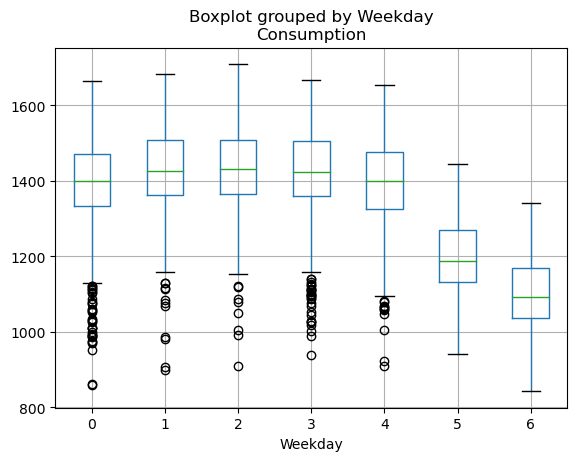

In [273]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday');

Konsumsi listrik secara signifikan lebih tinggi pada hari kerja dibandingkan pada akhir pekan. Outliers rendah pada hari kerja mungkin selama hari libur/holidays.

### Resample

In [275]:
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [276]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


#### Membandingkan solar harian dan mingguan dalam periode 6 bulan

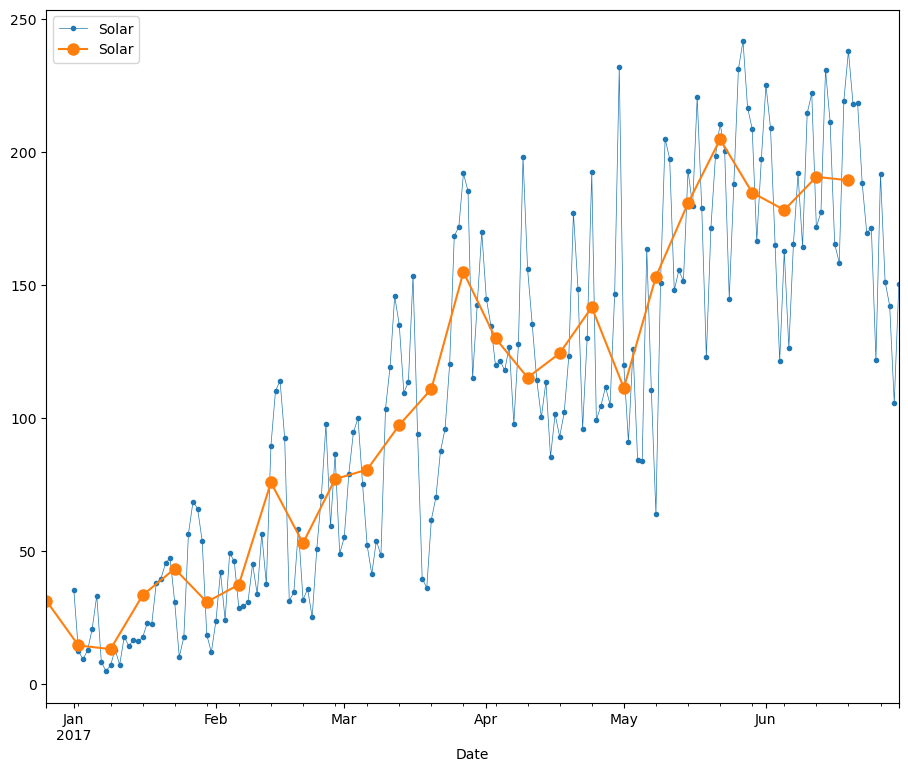

In [282]:
start, end = '2017-01', '2017-06'

opsd_daily.loc[start:end, 'Solar'].plot(marker='.', 
linestyle='-', linewidth=0.5, figsize=(11,9), legend=True)

opsd_weekly_mean.loc[start:end, 'Solar'].plot(marker='o', 
markersize=8, linestyle='-', figsize=(11,9), legend=True);

Diagram diatas menunjukkan rata-rata harian dan data mingguan